# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [211]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_path = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
combined_mousedata_df = pd.merge(study_results_path, mouse_metadata_df,
                                 how='left', on='Mouse ID')


# Display the data table for preview
combined_mousedata_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [212]:
# Checking the number of mice.
# combined_mousedata_df["Mouse ID"].nunique()
len(combined_mousedata_df["Mouse ID"].unique())

249

In [213]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ID = combined_mousedata_df.loc[combined_mousedata_df.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [214]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_mouse_data = combined_mousedata_df.loc[combined_mousedata_df[g989]
                                                 

In [215]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_df = combined_mousedata_df[combined_mousedata_df["Mouse ID"].isin(duplicate_mouse_ID)==False]
clean_mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [216]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(clean_mouse_data_df["Mouse ID"].unique())
clean_mice

248

## Summary Statistics

In [217]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_mean = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mouse_median = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mouse_var = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mouse_std = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
mouse_sem = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Table summary
summary_statistics = pd.DataFrame(
    {
        "Mean Tumor Volume":mouse_mean,
        "Median Tumor Volume":mouse_median,
        "Variance Tumor Volume":mouse_var,
        "Standard deviation Tumor Volume":mouse_std,
        "SEM Tumor Volume":mouse_sem
        
    }

)
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [218]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,


# and SEM of the tumor volume for each regimen (only one method is required in the solution)



# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_table = clean_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std","sem"]})
summary_statistics_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

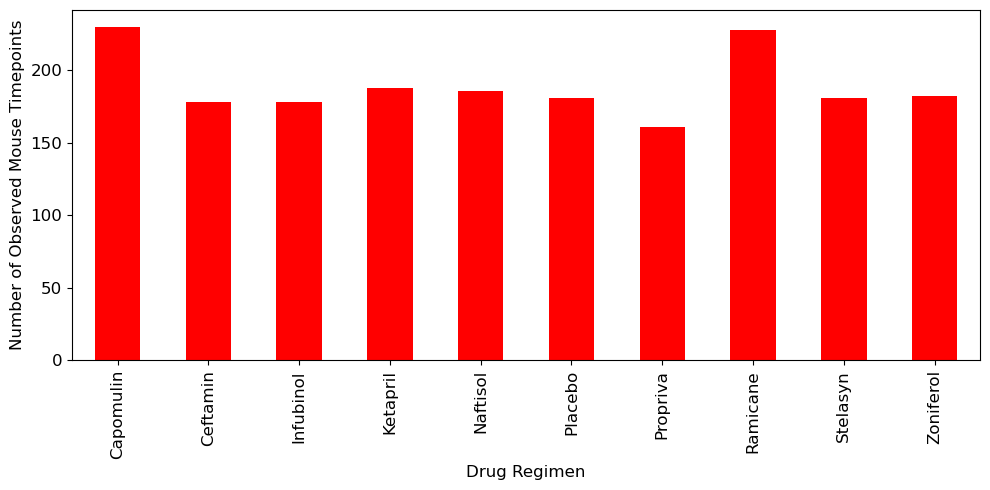

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [219]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_number_per_tret = combined_mousedata_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = mice_number_per_tret.plot.bar(figsize=(10,5), color='r',fontsize = 12)
mice_number_per_tret
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Observed Mouse Timepoints",fontsize = 12)


plt.savefig("../mice_number_per_tret.png")
plt.tight_layout()
plt.show()

mice_number_per_tret

In [220]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#  Create an array that contains the number of mice each drug regimen has

mice_list =(combined_mousedata_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

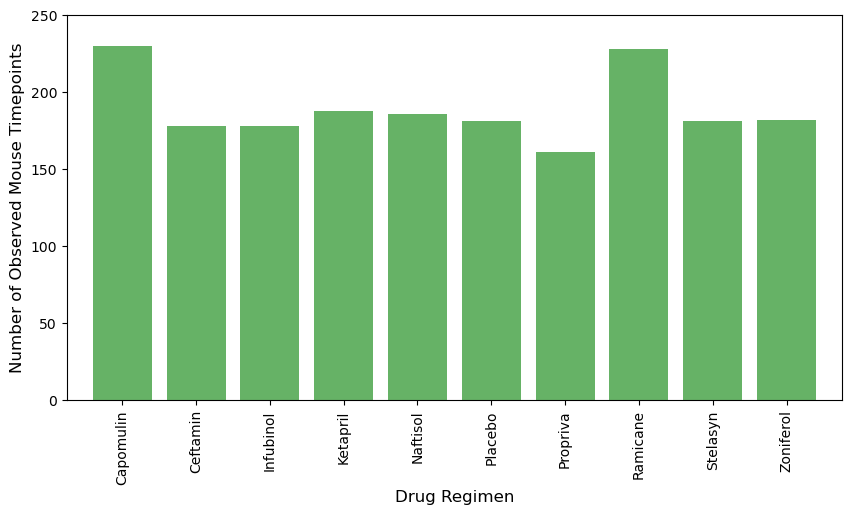

In [221]:
x_axis = np.arange(len(mice_number_per_tret))
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.bar(x_axis, mice_list, color='g', alpha=0.6, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+20)


plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Observed Mouse Timepoints",fontsize = 12)

plt.savefig("../mice_number_per_tret 1.png")

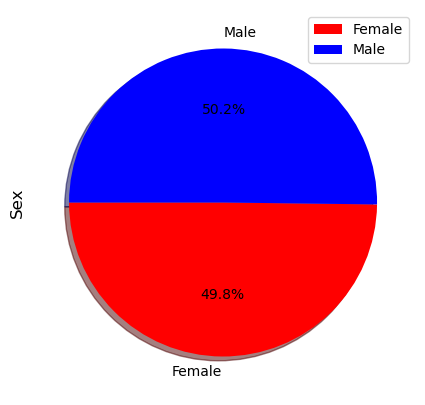

In [222]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_gender = combined_mousedata_df.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())
gender_df
# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender

colors = ['red', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(10,5), colors = colors, startangle=180, shadow = True, autopct="%1.1f%%")


plt.ylabel('Sex',fontsize = 12)

plt.savefig("../female_versus_male_mice.png")
plt.show()

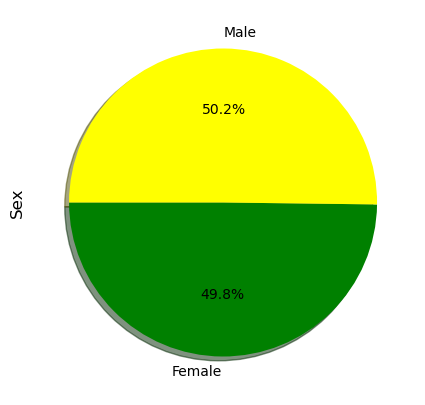

In [223]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['green', 'yellow']

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180,)
plt.ylabel('Sex',fontsize = 12)


plt.savefig("../female_versus_male_mice_1.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [224]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = combined_mousedata_df.loc[combined_mousedata_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = combined_mousedata_df.loc[combined_mousedata_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = combined_mousedata_df.loc[combined_mousedata_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = combined_mousedata_df.loc[combined_mousedata_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [225]:
# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, combined_mousedata_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [226]:
# Ramicane

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, combined_mousedata_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [227]:
# Infubinol 
# Determine outliers using upper and lower bounds

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, combined_mousedata_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [228]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, combined_mousedata_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [229]:
# Put treatments into a list for for loop (and later for plot labels)

Capomulin_treated_tumor = Capomulin_merge["Tumor Volume (mm3)"]
Ramicane_treated_tumor = Ramicane_merge["Tumor Volume (mm3)"]
Infubinol_treated_tumor = Infubinol_merge["Tumor Volume (mm3)"]
Ceftaminl_treated_tumor = Ceftamin_merge["Tumor Volume (mm3)"]

# Table summary
summary_treated_table = pd.DataFrame(
    {
        "Capomulin Treated Tumor":Capomulin_treated_tumor,
        "Ramicane Treated Tumor":Ramicane_treated_tumor,
        "Infubinol Treated Tumor":Infubinol_treated_tumor,
        "Ceftaminl Treated Tumor":Ceftaminl_treated_tumor
        
    }

)
summary_treated_table




    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    

,Capomulin Treated Tumor,Ramicane Treated Tumor,Infubinol Treated Tumor,Ceftaminl Treated Tumor
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [230]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = Capomulin_treated_tumor.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of treatment is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [231]:
quartiles = Ramicane_treated_tumor.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [232]:
quartiles = Infubinol_treated_tumor.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [233]:
quartiles = Ceftaminl_treated_tumor.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


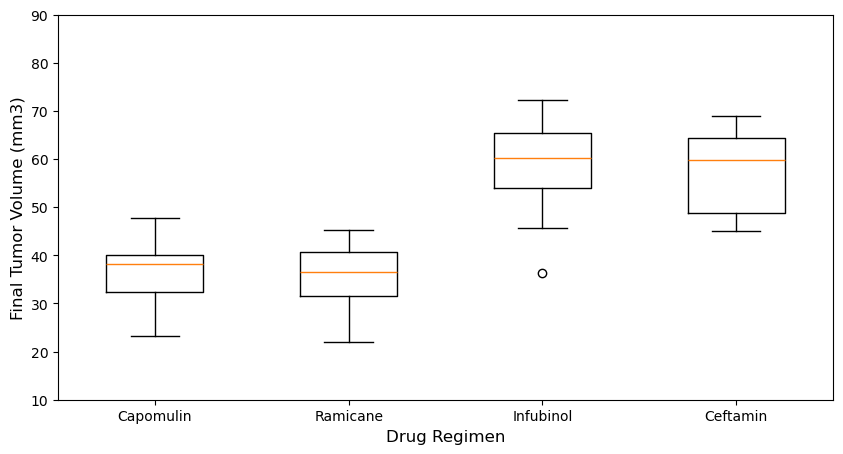

In [234]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [Capomulin_treated_tumor, Ramicane_treated_tumor, Infubinol_treated_tumor, Ceftaminl_treated_tumor]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.5)

plt.ylim(10, 90)

plt.savefig("../Drug_regimen_versus_tumor_volume_box.png")

plt.show()

## Line and Scatter Plots

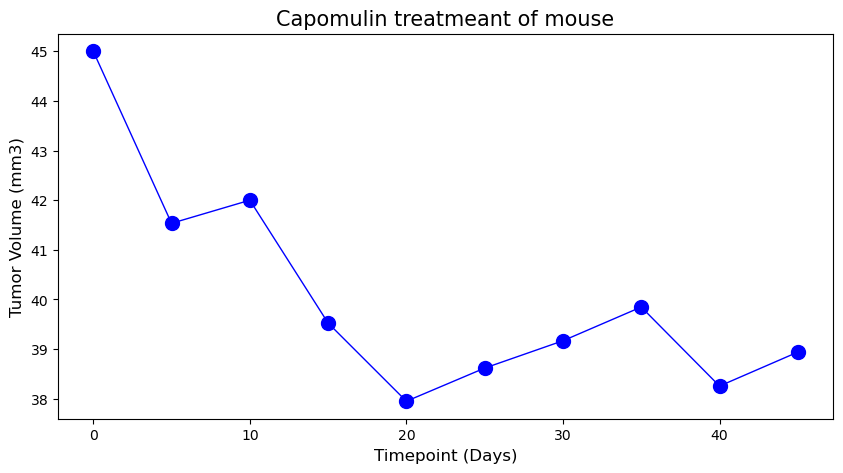

In [235]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.subplots(figsize=(10, 5))
plt.title('Capomulin treatmeant of mouse',fontsize =15)
plt.plot(x_axis, tumsiz,linewidth=1, markersize=10,marker="o",color="blue")
plt.xlabel('Timepoint (Days)',fontsize =12)
plt.ylabel('Tumor Volume (mm3)',fontsize =12)


plt.savefig("..\line_graph.png")
plt.show()

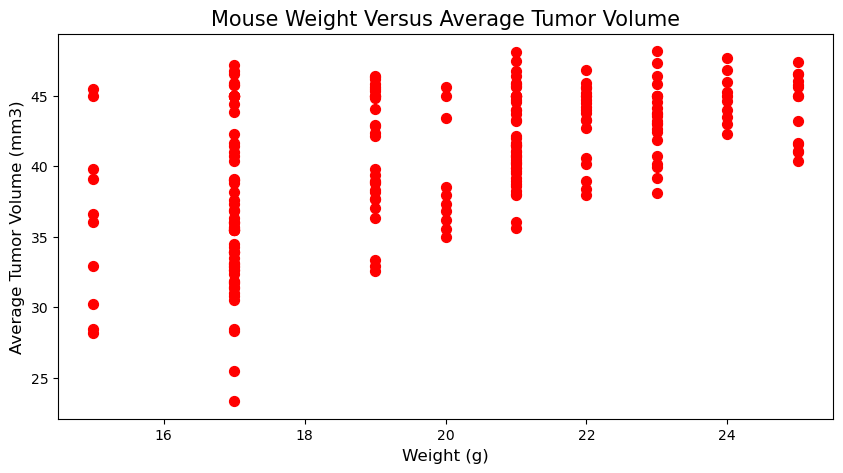

In [236]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#avg_capomulin = capomulin_df.groupby['Mouse ID'].mean()

plt.subplots(figsize=(10, 5))
plt.scatter(Capomulin_df['Weight (g)'],Capomulin_df['Tumor Volume (mm3)'],s=50, color="red")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =15)
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =12)


plt.savefig("../scatterplot.png")
plt.show()

## Correlation and Regression

In [240]:
# Calculate the correlation coefficient and a linear regression model 
corr, _ = pearsonr(Capomulin_df['Tumor Volume (mm3)'], Capomulin_df['Weight (g)'])
corr_rounded = round(corr, 2)
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = Capomulin_df['Weight (g)']
y_values = Capomulin_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9609669432428355
intercept:21.489827213299566
rvalue (Correlation coefficient):0.5256995552077169
pandas (Correlation coefficient):0.525699555207717
stderr:0.10298279892023657
y = 0.96x + 21.49
